<a href="https://colab.research.google.com/github/AlexNoonan-Syracuse/BigDataProject/blob/main/BigDataLab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from pandas.io.html import read_html
import fuzzymatcher

# Obtain data and understand elements
csvURL = "https://raw.githubusercontent.com/2SUBDA/IST_718/master/Coaches9.csv"

coaches = pd.read_csv(csvURL)
#print(coaches.isna().sum())

#print(coaches.head())

# cleaning and changing dtype of numeric columns
coaches['SchoolPay'] = coaches['SchoolPay'].str.replace(',', '')
coaches['SchoolPay'] = coaches['SchoolPay'].str.replace('$', '')
coaches['SchoolPay'] = coaches['SchoolPay'].str.replace('--', '')
coaches['SchoolPay'] = pd.to_numeric(coaches['SchoolPay'])

coaches['TotalPay'] = coaches['TotalPay'].str.replace(',', '')
coaches['TotalPay'] = coaches['TotalPay'].str.replace('$', '')
coaches['TotalPay'] = coaches['TotalPay'].str.replace('--', '')
coaches['TotalPay'] = pd.to_numeric(coaches['TotalPay'])

coaches['Bonus'] = coaches['Bonus'].str.replace(',', '')
coaches['Bonus'] = coaches['Bonus'].str.replace('$', '')
coaches['Bonus'] = coaches['Bonus'].str.replace('--', '')
coaches['Bonus'] = pd.to_numeric(coaches['Bonus'])
coaches['Bonus'] = coaches['Bonus'].fillna(0)

coaches['BonusPaid'] = coaches['BonusPaid'].str.replace(',', '')
coaches['BonusPaid'] = coaches['BonusPaid'].str.replace('$', '')
coaches['BonusPaid'] = coaches['BonusPaid'].str.replace('--', '')
coaches['BonusPaid'] = pd.to_numeric(coaches['BonusPaid'])
coaches['BonusPaid'] = coaches['BonusPaid'].fillna(0)

coaches['AssistantPay'] = coaches['AssistantPay'].str.replace(',', '')
coaches['AssistantPay'] = coaches['AssistantPay'].str.replace('$', '')
coaches['AssistantPay'] = coaches['AssistantPay'].str.replace('--', '')
coaches['AssistantPay'] = pd.to_numeric(coaches['AssistantPay'])

coaches['Buyout'] = coaches['Buyout'].str.replace(',', '')
coaches['Buyout'] = coaches['Buyout'].str.replace('$', '')
coaches['Buyout'] = coaches['Buyout'].str.replace('--', '')
coaches['Buyout'] = pd.to_numeric(coaches['Buyout'])
coaches['Buyout'] = coaches['Buyout'].fillna(0)

print(coaches.head())

                  School Conference  ... AssistantPay      Buyout
0              Air Force   Mt. West  ...            0         0.0
1                  Akron        MAC  ...            0    688500.0
2                Alabama        SEC  ...            0  33600000.0
3  Alabama at Birmingham      C-USA  ...            0   3847500.0
4      Appalachian State   Sun Belt  ...            0   2160417.0

[5 rows x 9 columns]


In [9]:
# pulling in other data sources

#stadium capacity

page = 'https://www.collegegridirons.com/comparisons-by-capacity/'
table1 = read_html(page, index_col=0, attrs={"class":"tableizer-table"})
table1 = pd.DataFrame(table1[0])

table1.dtypes

College       object
Conference    object
Capacity       int64
Opened         int64
dtype: object

In [28]:
#win rates 
table2 = read_html('https://www.ncaa.com/stats/football/fbs/current/team/742')
#wikitables = read_html(page, index_col=0, infer_types=False, attrs={"class":"wikitable"})
table2 = pd.DataFrame(table2[0])

table3 = read_html('https://www.ncaa.com/stats/football/fbs/current/team/742/p2')
table3 = pd.DataFrame(table3[0])
table4 = read_html('https://www.ncaa.com/stats/football/fbs/current/team/742/p3')
table4 = pd.DataFrame(table4[0])
table2 = table2.append(table3)
table2 = table2.append(table4)

#table2.head()


In [ ]:
table6 = read_html("https://sports.usatoday.com/ncaa/finances")

In [14]:
# grad data 
table5 = pd.read_csv("https://raw.githubusercontent.com/AlexNoonan-Syracuse/lab3/main/26801-0001-Data.tsv", sep="\t")

#print(table5.head())
#print(table5.columns)
#table5.describe()

  DATA_TAB_GENERALINFO  SCL_UNITID  ... PUB_AWARD_06  RAW_OR_CI
0                           100654  ...            1          1
1                           100654  ...            0          2
2                           100654  ...            0          2
3                           100654  ...            0          2
4                           100654  ...            0          2

[5 rows x 76 columns]
Index(['DATA_TAB_GENERALINFO', 'SCL_UNITID', 'SCL_NAME', 'SPORT_CODE',
       'SPORT_NAME', 'ACADEMIC_YEAR', 'SCL_DIV_14', 'SCL_SUB_14',
       'CONFNAME_14', 'D1_FB_CONF_14', 'SCL_HBCU', 'SCL_PRIVATE',
       'DATA_TAB_MULTIYRRATE', 'MULTIYR_APR_RATE_1000_RAW',
       'MULTIYR_APR_RATE_1000_CI', 'MULTIYR_APR_RATE_1000_OFFICIAL',
       'MULTIYR_ELIG_RATE', 'MULTIYR_RET_RATE', 'MULTIYR_SQUAD_SIZE',
       'DATA_TAB_ANNUALRATE', 'APR_RATE_2014_1000', 'ELIG_RATE_2014',
       'RET_RATE_2014', 'NUM_OF_ATHLETES_2014', 'APR_RATE_2013_1000',
       'ELIG_RATE_2013', 'RET_RATE_2013', 'NUM_OF_A

In [27]:
# joining coaches to table 1 
# maybe do some name normalizing instead

left_on1 = ["School", "Conference"]
right_on1 = ["College", "Conference"]

df1 = fuzzymatcher.fuzzy_left_join(coaches,table1, left_on1, right_on1)

df2 = df1[df1['best_match_score'] > 0.1 ]

df2 = df2.drop(columns=['best_match_score', '__id_left', '__id_right', 'Conference_left','Conference_right'])

# joining table 2
left_on2 = ["School"]
right_on2 = ["Team"]


#df1 = fuzzymatcher.fuzzy_left_join(df1, table2, left_on2, right_on2)


# join main df to table 5

right_on3 = ["SCL_NAME", "SCL_CONFERENCE"]
#df1 = fuzzymatcher.fuzzy_left_join(df1, table2, left_on1, right_on3)

df2

table2Names = list(table2['Team'].unique())
#print(table2Names)
table5Names = list(table5['SCL_NAME'].unique())
table1Names = list(table1['College'].unique())
#print(table5Names)
#print(table1Names)

In [ ]:
print(len(coaches))

#print(coaches.dtypes)
print(coaches.isna().sum())

#coaches.head()
# na values in Schoolpay and total pay gotta do something with these.
#coaches.loc[coaches['SchoolPay'].isna()]
coaches.loc[coaches['TotalPay'].isna()]



129


,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,ConferenceCodes_x,ConferenceCodes_y
47,Rice,C-USA,Mike Bloomgren,NaN,NaN,0.0,0.0,0,0.0,3,3
75,Brigham Young,Ind.,Kalani Sitake,NaN,NaN,0.0,0.0,0,0.0,6,6
80,Baylor,Big 12,Matt Rhule,NaN,NaN,0.0,0.0,0,0.0,7,7
112,Southern Methodist,AAC,Sonny Dykes,NaN,NaN,0.0,0.0,0,0.0,9,9


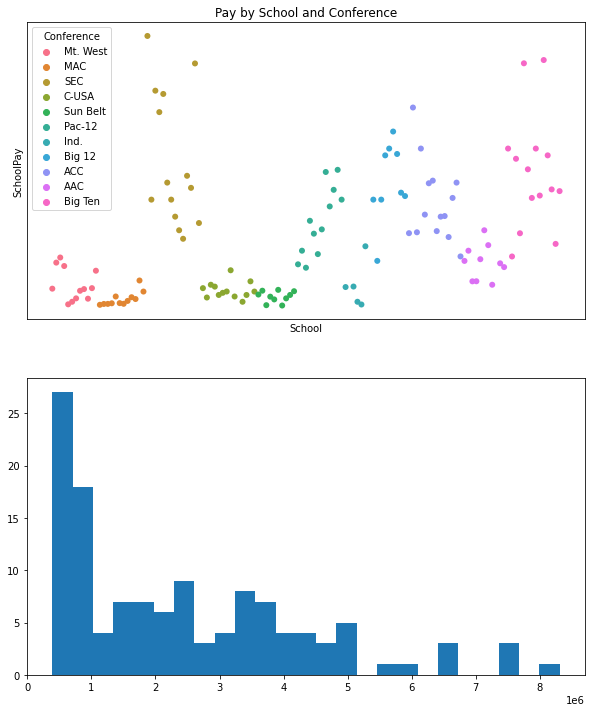

390000.0
8307000.0


In [ ]:
from IPython.core.pylabtools import figsize
# descriptive statistics

coaches.describe()


codes, values = pd.factorize(coaches['Conference'].unique())
conferenceIds = pd.DataFrame({"Conference":values, "ConferenceCodes":codes})
coaches = pd.merge(left=coaches, right=conferenceIds, left_on="Conference", right_on = "Conference")
coaches.head()

fig, axs = plt.subplots(2, 1, figsize = (10,12))
g1 = sns.scatterplot(x='School', y='SchoolPay', data=coaches, hue='Conference', ec=None, ax=axs[0] )
g1.set(xticklabels=[])
g1.set(title='Pay by School and Conference')
g1.set(xlabel="School")
g1.set(xticks=[])
g1.set(yticks=[])


axs[1].hist(x= coaches['TotalPay'], bins=25)

plt.show()
print(coaches['TotalPay'].min())
print(coaches['TotalPay'].max())

# box plots per conference


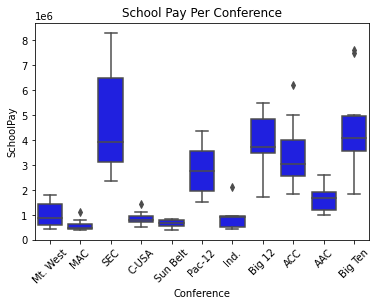

In [ ]:
fig, axis = plt.subplots()
axis.set_xlabel('Conference')
axis.set_ylabel('SchoolPay')
axis.set_title("School Pay Per Conference")
conference = sns.boxplot(x="Conference", y="SchoolPay", data=coaches, color = "blue"  );

axis.set_xticklabels(coaches['Conference'].unique())
axis.tick_params(axis="x", labelrotation=45 )
plt.show()

